4
0  =  3.91649125627335
1  =  33.993426918148366
2  =  46.66192804275853
3  =  1.881035066776426
4  =  28.543841354178564
5  =  24.1296476086492
6  =  6.3163587190180905
7  =  43.815498740194755
8  =  20.49593050237813
9  =  14.805405721908155
10  =  28.26465326924045
11  =  2.9154860377037837
12  =  47.07509687357168
13  =  20.9787860834072
14  =  33.250760670968084
15  =  33.801343724948886
16  =  13.011427866998519
17  =  32.4046549859621
18  =  23.84071260272776
19  =  0.45087925712613686
20  =  1.030425913826639
21  =  36.113056017842915
22  =  8.385839724817995
23  =  18.210780486042445
24  =  22.612582871197986
25  =  18.74551787168357
26  =  45.7947271947699
27  =  13.05075405483036
28  =  11.879042287954753
29  =  34.65105647141008
30  =  44.785839085700516
31  =  18.810091984595957
32  =  31.83312489444303
33  =  47.2539898987457
34  =  1.1553018830927533
35  =  42.26273933332451
36  =  40.05627103576819
37  =  7.976493552840429
38  =  37.92591496961387
39  =  22.17083734178

c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

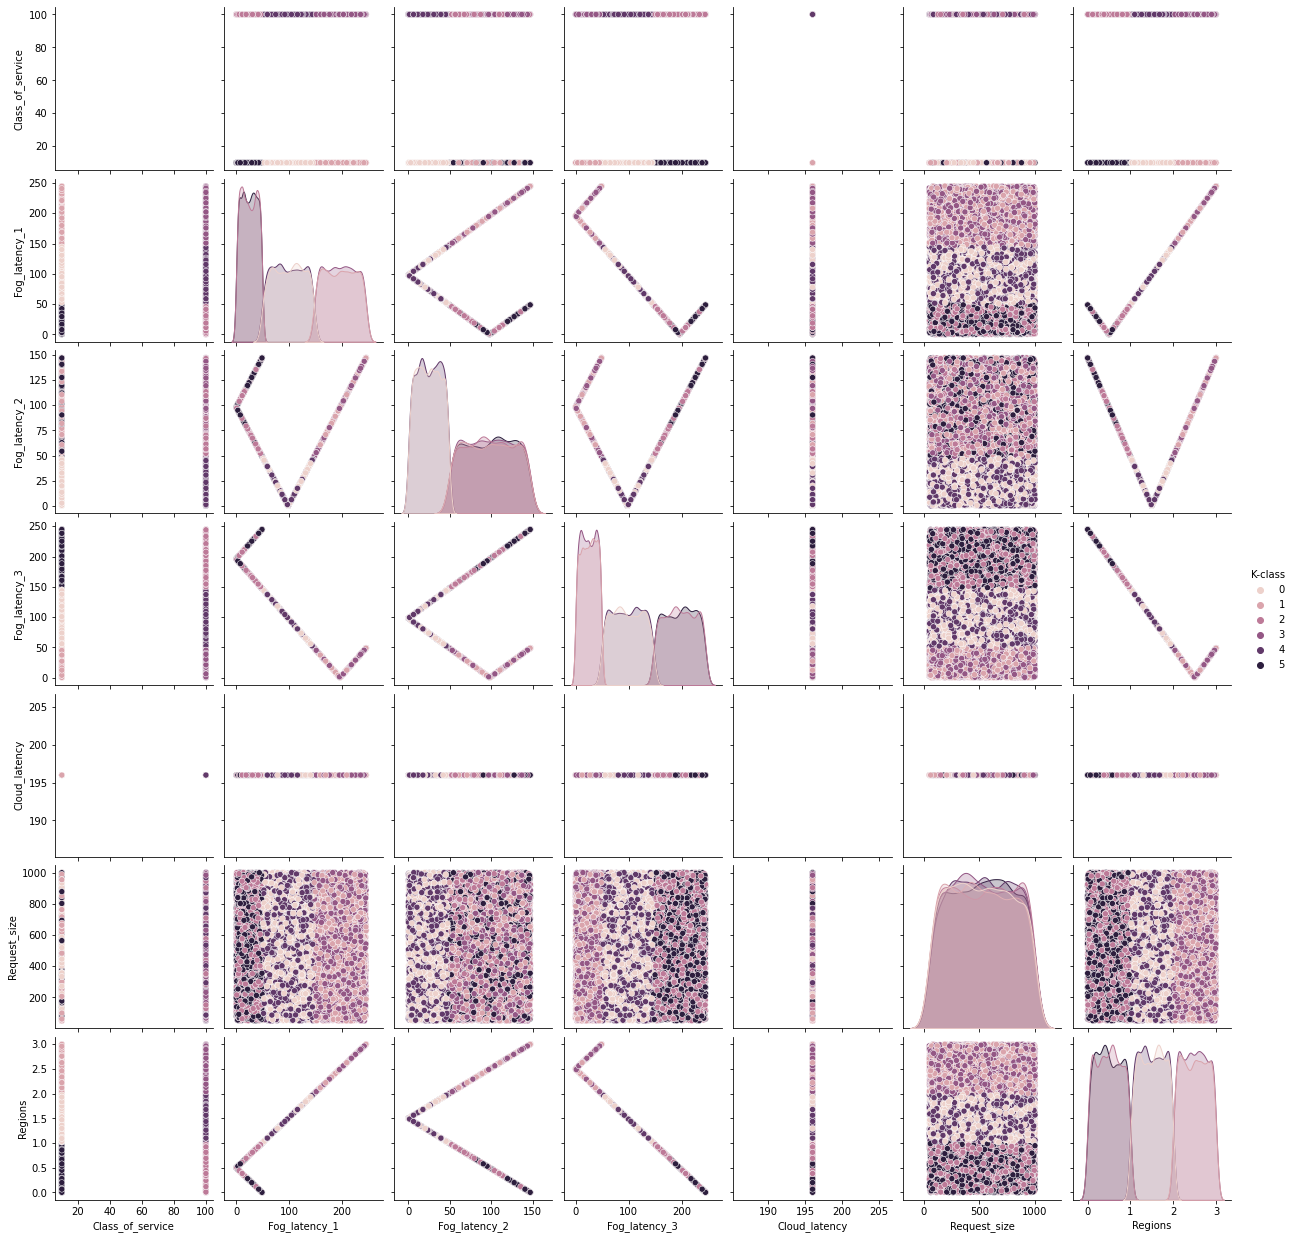

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

list_of_devices = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = devicesDf.groupby('Hour')

#Definição ótima da quantidade de clusters
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt(abs((y2 - y1)*2 + (x2 - x1)*2))
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
X = np.array(devicesDf.drop(['Device_id', 'Request_size'], axis = 1))


sum_of_squares = calculate_wcss(X)

n = optimal_number_of_clusters(sum_of_squares)

print(n)

#aplicação do kmeans
kmeans = KMeans(n_clusters=6, init= 'k-means++',n_init = 10, max_iter = 10000)
kmeans.fit_predict(X)

kmeans.labels_
devicesDf['K-class'] = kmeans.labels_
devicesDf

sum_smallest_latency = 0

for index in range(len(devicesDf)):
    smallest_latency = min([devicesDf["Fog_latency_1"].iloc[index], devicesDf["Fog_latency_2"].iloc[index], devicesDf["Fog_latency_3"].iloc[index]])
    sum_smallest_latency += smallest_latency
    print(index, " = ", smallest_latency)

media_latency = sum_smallest_latency / devicesDf.shape[0]

print("Latencia média = ", media_latency)

sb.pairplot(devicesDf, hue="K-class")

<h1>ploting line graph standard and priority workload by time</h1>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  6
quantidade dispositivos standard =  12
Menor latencia media =  9.925798563405753
latencia média por prioridade =  140.59246523007243
Horário =  1


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  6
quantidade dispositivos prioritarios =  16
quantidade dispositivos standard =  20
Menor latencia media =  8.219164876659658
latencia média por prioridade =  117.10805376554852
Horário =  2


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  28
quantidade dispositivos standard =  42
Menor latencia media =  9.548933081709041
latencia média por prioridade =  127.14893308170906
Horário =  3


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  64
quantidade dispositivos standard =  63
Menor latencia media =  12.40712034781733
latencia média por prioridade =  109.63546680451029
Horário =  4


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  115
quantidade dispositivos standard =  101
Menor latencia media =  11.888630873119636
latencia média por prioridade =  103.53677902126778
Horário =  5


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  190
quantidade dispositivos standard =  155
Menor latencia media =  13.294912387181279
latencia média por prioridade =  101.35288340167406
Horário =  6


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  247
quantidade dispositivos standard =  271
Menor latencia media =  11.677149028461605
latencia média por prioridade =  114.21768956900219
Horário =  7


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  401
quantidade dispositivos standard =  330
Menor latencia media =  13.260353684098762
latencia média por prioridade =  101.74188583184161
Horário =  8


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  477
quantidade dispositivos standard =  491
Menor latencia media =  12.147337066456407
latencia média por prioridade =  111.56469243835731
Horário =  9


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  610
quantidade dispositivos standard =  595
Menor latencia media =  12.809864956320315
latencia média por prioridade =  109.58994794387218
Horário =  10


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  703
quantidade dispositivos standard =  705
Menor latencia media =  12.366996680941613
latencia média por prioridade =  110.50620122639617
Horário =  11


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  786
quantidade dispositivos standard =  761
Menor latencia media =  12.25134258953449
latencia média por prioridade =  108.66763218229464
Horário =  12


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  786
quantidade dispositivos standard =  810
Menor latencia media =  12.17957079749887
latencia média por prioridade =  111.65325500802528
Horário =  13


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  778
quantidade dispositivos standard =  769
Menor latencia media =  12.154267034233746
latencia média por prioridade =  109.58413128762736
Horário =  14


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  738
quantidade dispositivos standard =  670
Menor latencia media =  12.84312276655845
latencia média por prioridade =  106.11016822110383
Horário =  15


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  594
quantidade dispositivos standard =  611
Menor latencia media =  12.156349342138405
latencia média por prioridade =  111.53892195624638
Horário =  16


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  485
quantidade dispositivos standard =  483
Menor latencia media =  12.402958354158928
latencia média por prioridade =  110.20047901531605
Horário =  17


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  368
quantidade dispositivos standard =  363
Menor latencia media =  12.210847880331949
latencia média por prioridade =  109.540533242849
Horário =  18


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  268
quantidade dispositivos standard =  250
Menor latencia media =  12.897624433785596
latencia média por prioridade =  107.49221902838015
Horário =  19


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  163
quantidade dispositivos standard =  182
Menor latencia media =  11.55738465171315
latencia média por prioridade =  114.9544861009885
Horário =  20


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  107
quantidade dispositivos standard =  109
Menor latencia media =  11.614381241128058
latencia média por prioridade =  110.52178864853542
Horário =  21


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  74
quantidade dispositivos standard =  53
Menor latencia media =  15.527081020019885
latencia média por prioridade =  97.3223566105711
Horário =  22


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  37
quantidade dispositivos standard =  33
Menor latencia media =  12.319431506554004
latencia média por prioridade =  104.71943150655396
Horário =  23


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  24
quantidade dispositivos standard =  12
Menor latencia media =  16.121772247994798
latencia média por prioridade =  81.45510558132813


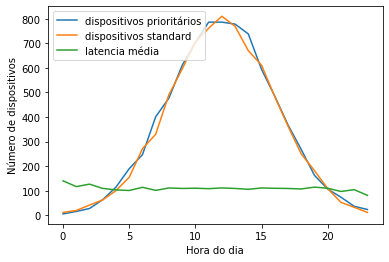

In [3]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

list_of_devices = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))
#Definição ótima da quantidade de clusters
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt(abs((y2 - y1)*2 + (x2 - x1)*2))
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
#X = np.array(devicesDf.drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0

    for index in range(len(df_by_hour[str(i)])):
        if df_by_hour[str(i)]['Class_of_service'].iloc[index] == 100:
            smallest_latency = min([df_by_hour[str(i)]["Fog_latency_1"].iloc[index], df_by_hour[str(i)]["Fog_latency_2"].iloc[index], df_by_hour[str(i)]["Fog_latency_3"].iloc[index]])
            sum_smallest_latency += smallest_latency
            num_priority += 1
            latency_by_priority += smallest_latency
        else:
            num_standard += 1
            latency_by_priority += df_by_hour[str(i)]['Cloud_latency'].iloc[index]

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    media_smallest_latency = sum_smallest_latency / df_by_hour[str(i)].shape[0]
    X = np.array(df_by_hour[str(i)].drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

    sum_of_squares = calculate_wcss(X)
    n = optimal_number_of_clusters(sum_of_squares)

    print("Número ótimo de clusters = ", n)

    #aplicação do kmeans
    kmeans = KMeans(n_clusters=6, init= 'k-means++',n_init = 10, max_iter = 10000)
    kmeans.fit_predict(X)

    #kmeans.labels_
    df_by_hour[str(i)]['K-class'] = kmeans.labels_
    #devicesDf

    print("quantidade dispositivos prioritarios = ", num_priority)
    print("quantidade dispositivos standard = ", num_standard)

    print("Menor latencia media = ", media_smallest_latency)
    print("latencia média por prioridade = ", media_priority_latency)

    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)
    #sb.pairplot(df_by_hour[str(i)], hue="K-class")

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

In [17]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans
import utilities

list_of_devices = []
processing_nodes = utilities.instantiate_processing_nodes(1, 3)

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        for fog_latency in range(len(t['latency'])):
            device.append(t['latency'][fog_latency])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))
#Definição ótima da quantidade de clusters
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt(abs((y2 - y1)*2 + (x2 - x1)*2))
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
#X = np.array(devicesDf.drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

# loop by hour of the workload database
for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0

    # removing some not used columns
    X = np.array(df_by_hour[str(i)].drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

    sum_of_squares = calculate_wcss(X)
    n = optimal_number_of_clusters(sum_of_squares)

    # clustering by hour    
    kmeans = KMeans(n_clusters=6, init= 'k-means++',n_init = 10, max_iter = 10000)
    kmeans.fit_predict(X)

    # add cluster label to each device
    df_by_hour[str(i)]['K-class'] = kmeans.labels_

    centers = np.array(kmeans.cluster_centers_)
    
    # get region centroid for each cluster and put it on a list with the cluster label
    # gonna be used to define the processing node each device will go depending of the cluster they're in
    ordered_clusters = []
    for cluster_index in range(len(centers)):
        # hardcoded -1 - last element on the centers is the centroid of the region
        ordered_clusters.append((centers[cluster_index][-1], cluster_index))

    # sort list of centroid and label of each cluster by the centroid
    ordered_clusters.sort()

    # for loop in each tuple of (centroid, label) of each cluster
    for index in ordered_clusters:
        print("index = ", index)

        # list of devices for each region
        devices_region_1 = []
        devices_region_2 = []
        devices_region_3 = []

        # loop through all devices in this hour
        for devices in range(len(df_by_hour[str(i)])):
            device = df_by_hour[str(i)]['K-class'].iloc[devices]

            if device == index[1] and (index[1] == 0 or index[1] == 1):
                devices_region_1.append(df_by_hour[str(i)].iloc[devices])
            elif device == index[1] and (index[1] == 2 or index[1] == 3):
                devices_region_2.append(df_by_hour[str(i)].iloc[devices])
            elif device == index[1] and (index[1] == 4 or index[1] == 5):
                devices_region_3.append(df_by_hour[str(i)].iloc[devices])

    print("########## Region 1 ##########")
    print(devices_region_1)
    print("########## Region 2 ##########")
    print(devices_region_2)
    print("########## Region 3 ##########")
    print(devices_region_3)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


index =  (0.2618843389144818, 1)
Region 1
[Hour                                                   0
Device_id           ea146bf6-c4b8-490f-a561-200d6bb656ab
Class_of_service                                      10
Fog_latency_1                                 199.916491
Fog_latency_2                                 101.916491
Fog_latency_3                                   3.916491
Cloud_latency                                        196
Request_size                                         125
Regions                                         2.539964
K-class                                                2
Name: 0, dtype: object, Hour                                                   0
Device_id           4165886d-dd3e-4474-b140-3b6b728f98e5
Class_of_service                                     100
Fog_latency_1                                  33.993427
Fog_latency_2                                 131.993427
Fog_latency_3                                 229.993427
Cloud_latency        

c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


index =  (0.2729648176394852, 5)
Region 1
[]
Region 2
[]
Region 3
[Hour                                                   1
Device_id           0cc9e245-578b-44de-9821-dee42037895b
Class_of_service                                      10
Fog_latency_1                                  74.159287
Fog_latency_2                                  23.840713
Fog_latency_3                                 121.840713
Cloud_latency                                        196
Request_size                                         195
Regions                                         1.256727
K-class                                                1
Name: 18, dtype: object, Hour                                                   1
Device_id           8d60b4ce-0e4f-41d5-bbb1-2fc6375ed031
Class_of_service                                     100
Fog_latency_1                                  97.549121
Fog_latency_2                                   0.450879
Fog_latency_3                                  98.450

c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


index =  (0.44223472651534257, 5)
Region 1
[]
Region 2
[]
Region 3
[Hour                                                   2
Device_id           651a1910-b89e-4c6f-a711-d9bc1850eafb
Class_of_service                                      10
Fog_latency_1                                 143.772888
Fog_latency_2                                  45.772888
Fog_latency_3                                  52.227112
Cloud_latency                                        196
Request_size                                         311
Regions                                          1.96707
K-class                                                3
Name: 54, dtype: object, Hour                                                   2
Device_id           e7c3fe59-e1af-4651-a750-9dc2b656964b
Class_of_service                                      10
Fog_latency_1                                  70.072709
Fog_latency_2                                  27.927291
Fog_latency_3                                 125.92

c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


index =  (0.5567691019397679, 2)
Region 1
[]
Region 2
[Hour                                                   3
Device_id           a70a5615-7adb-4ff6-81c1-af92ebbb74c6
Class_of_service                                      10
Fog_latency_1                                  39.745678
Fog_latency_2                                  58.254322
Fog_latency_3                                 156.254322
Cloud_latency                                        196
Request_size                                         387
Regions                                         0.905568
K-class                                                2
Name: 127, dtype: object, Hour                                                   3
Device_id           3c46ff26-e3ec-44da-bd54-9efd4368d06d
Class_of_service                                      10
Fog_latency_1                                  35.529192
Fog_latency_2                                  62.470808
Fog_latency_3                                 160.470808
Cloud_l

c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


index =  (0.42903666172890986, 3)
Region 1
[]
Region 2
[Hour                                                   4
Device_id           22095fa6-b45b-45b0-b7c5-fb9d1135fd63
Class_of_service                                      10
Fog_latency_1                                  26.174329
Fog_latency_2                                  71.825671
Fog_latency_3                                 169.825671
Cloud_latency                                        196
Request_size                                         508
Regions                                         0.767085
K-class                                                1
Name: 251, dtype: object, Hour                                                   4
Device_id           4204fe75-b842-484f-9580-6c6851d76bf4
Class_of_service                                     100
Fog_latency_1                                  138.87054
Fog_latency_2                                   40.87054
Fog_latency_3                                   57.12946
Cloud_

c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


index =  (0.46838023778013715, 3)
Region 1
[]
Region 2
[Hour                                                   5
Device_id           de6e18fc-b0b0-4e41-ad43-03740a20eab6
Class_of_service                                     100
Fog_latency_1                                  58.569875
Fog_latency_2                                  39.430125
Fog_latency_3                                 137.430125
Cloud_latency                                        196
Request_size                                          53
Regions                                         1.097652
K-class                                                4
Name: 467, dtype: object, Hour                                                   5
Device_id           94291845-cb08-4dd0-8599-f8b9c5d41243
Class_of_service                                     100
Fog_latency_1                                  59.082562
Fog_latency_2                                  38.917438
Fog_latency_3                                 136.917438
Cloud_

c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


index =  (0.42120443155494436, 3)
Region 1
[]
Region 2
[Hour                                                   6
Device_id           18681dad-d756-46c2-9c7f-487c9224b7a5
Class_of_service                                      10
Fog_latency_1                                 129.423798
Fog_latency_2                                  31.423798
Fog_latency_3                                  66.576202
Cloud_latency                                        196
Request_size                                         193
Regions                                         1.820651
K-class                                                2
Name: 812, dtype: object, Hour                                                   6
Device_id           80f29561-221c-4f3c-88ee-3d79b3721c56
Class_of_service                                      10
Fog_latency_1                                  16.554756
Fog_latency_2                                 114.554756
Fog_latency_3                                 212.554756
Cloud_

c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


index =  (0.460065047968262, 2)
Region 1
[]
Region 2
[Hour                                                   7
Device_id           989be685-0074-4baa-90c1-7dad18e335e4
Class_of_service                                     100
Fog_latency_1                                  18.741716
Fog_latency_2                                  79.258284
Fog_latency_3                                 177.258284
Cloud_latency                                        196
Request_size                                         845
Regions                                         0.691242
K-class                                                2
Name: 1336, dtype: object, Hour                                                   7
Device_id           aab58d62-96a1-41cd-bec9-6d08952d222a
Class_of_service                                     100
Fog_latency_1                                  31.952563
Fog_latency_2                                 129.952563
Fog_latency_3                                 227.952563
Cloud_l

c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


index =  (0.5128929374660197, 4)
Region 1
[]
Region 2
[]
Region 3
[Hour                                                   8
Device_id           acd0821c-3462-4755-bfc9-4ea30a1debeb
Class_of_service                                      10
Fog_latency_1                                  39.807458
Fog_latency_2                                 137.807458
Fog_latency_3                                 235.807458
Cloud_latency                                        196
Request_size                                         471
Regions                                         0.093801
K-class                                                4
Name: 2071, dtype: object, Hour                                                   8
Device_id           93bee2fe-6f16-4a3a-b246-8b9246d198f3
Class_of_service                                      10
Fog_latency_1                                  43.526865
Fog_latency_2                                 141.526865
Fog_latency_3                                 239.5

c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KeyboardInterrupt: 

In [2]:
import utilities

processing_nodes = utilities.instantiate_processing_nodes(1, 3)

print(processing_nodes)

[<utilities.CloudNode object at 0x0000025D70331520>, <utilities.FogNode object at 0x0000025D70331700>, <utilities.FogNode object at 0x0000025D70331610>, <utilities.FogNode object at 0x0000025D703319A0>]
